<a href="https://colab.research.google.com/github/supreetsandhu/Seattle-Weather/blob/main/DATA_3320_Seattle_St_Louis_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objectives

1. Learn the data science methodology using a project that does not involve advanced statistical methods.

2. Learn to use Python for data science.

3. Be able to ask questions about data and find answers.

## Introduction

This notebook will show data regarding rain in Seattle and St. Louis.

## Import libraries

This is an import of different libraries that are needed to run various applications.




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

The libraries were sucessful uploaded.

## Load the data

The NOAA National Centers for Environmental Information provides access to many types of environmental data, including records of daily precipitation.

We can use their [website](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND) to request records of daily precipitation from Seattle and St. Louis (or other locations of interest) for the last 5 years (2018 - 2022). 

I have already obtained the data. The data are available at this [github repository](https://github.com/brian-fischer/DATA-3320/tree/main/weather) and are called `seattle_rain.csv` and `stl_rain.csv`.

The Seattle data will be loaded.

In [3]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/seattle_rain.csv')

The St. Louis data will be uploaded.

In [5]:
df_stlouis = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/stl_rain.csv')

## Convert data types, if necessary

### Convert `DATE` to datetime 

The Seattle and St. Louis datasets will convert their DATE varibale to a datetime format.

In [122]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])
df_stlouis['DATE'] = pd.to_datetime(df_stlouis['DATE'])

## Return to selecting the relevant subsets

 We will set the St. Louis data to 2018 and beyond so that both St. Louis and Seattle only contain data from 2018 and beyond.

In [44]:
df_stlouis = df_stlouis.loc[df_stlouis['DATE'] >= '2018-01-01']

In [47]:
df_stlouis = df_stlouis.loc[df_stlouis['NAME'] == 'ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US']

In [48]:
df_stlouis['STATION'].value_counts()

USW00013994    1826
Name: STATION, dtype: int64

The St. Louis data will now only have data from 2018 and above. The seattle dataset already only contains data from 2018 and beyond.

## Identify and deal with missing values

### Count the non-null or null values

Use the `.info()` method to determine the number of non-null values in each column. Start with the St. Louis data set.

In [50]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 51540 to 53365
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1826 non-null   object        
 1   NAME     1826 non-null   object        
 2   DATE     1826 non-null   datetime64[ns]
 3   DAPR     0 non-null      float64       
 4   MDPR     0 non-null      float64       
 5   PRCP     1826 non-null   float64       
 6   SNOW     1826 non-null   float64       
 7   SNWD     1826 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 128.4+ KB


In [51]:
df_stlouis.isna().sum()

STATION       0
NAME          0
DATE          0
DAPR       1826
MDPR       1826
PRCP          0
SNOW          0
SNWD          0
dtype: int64

The St. Louis data set does not have any `NaN` values of `DATE` or `PRCP`. 

Over 5 years there should be 

$$5 \times 365 + 1 = 1826$$

days. 

The St. Louis data set is not missing any dates or precipitation values. Check Seattle:

In [123]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1658 non-null   object        
 1   NAME     1658 non-null   object        
 2   DATE     1658 non-null   datetime64[ns]
 3   DAPR     23 non-null     float64       
 4   MDPR     23 non-null     float64       
 5   PRCP     1636 non-null   float64       
 6   SNOW     353 non-null    float64       
 7   SNWD     66 non-null     float64       
 8   WESD     15 non-null     float64       
 9   WESF     28 non-null     float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 129.7+ KB


The Seattle data set is missing some dates and precipitation values. We could see this in the time series plot.

We can use the library `missingno` to visualize where values are missing.

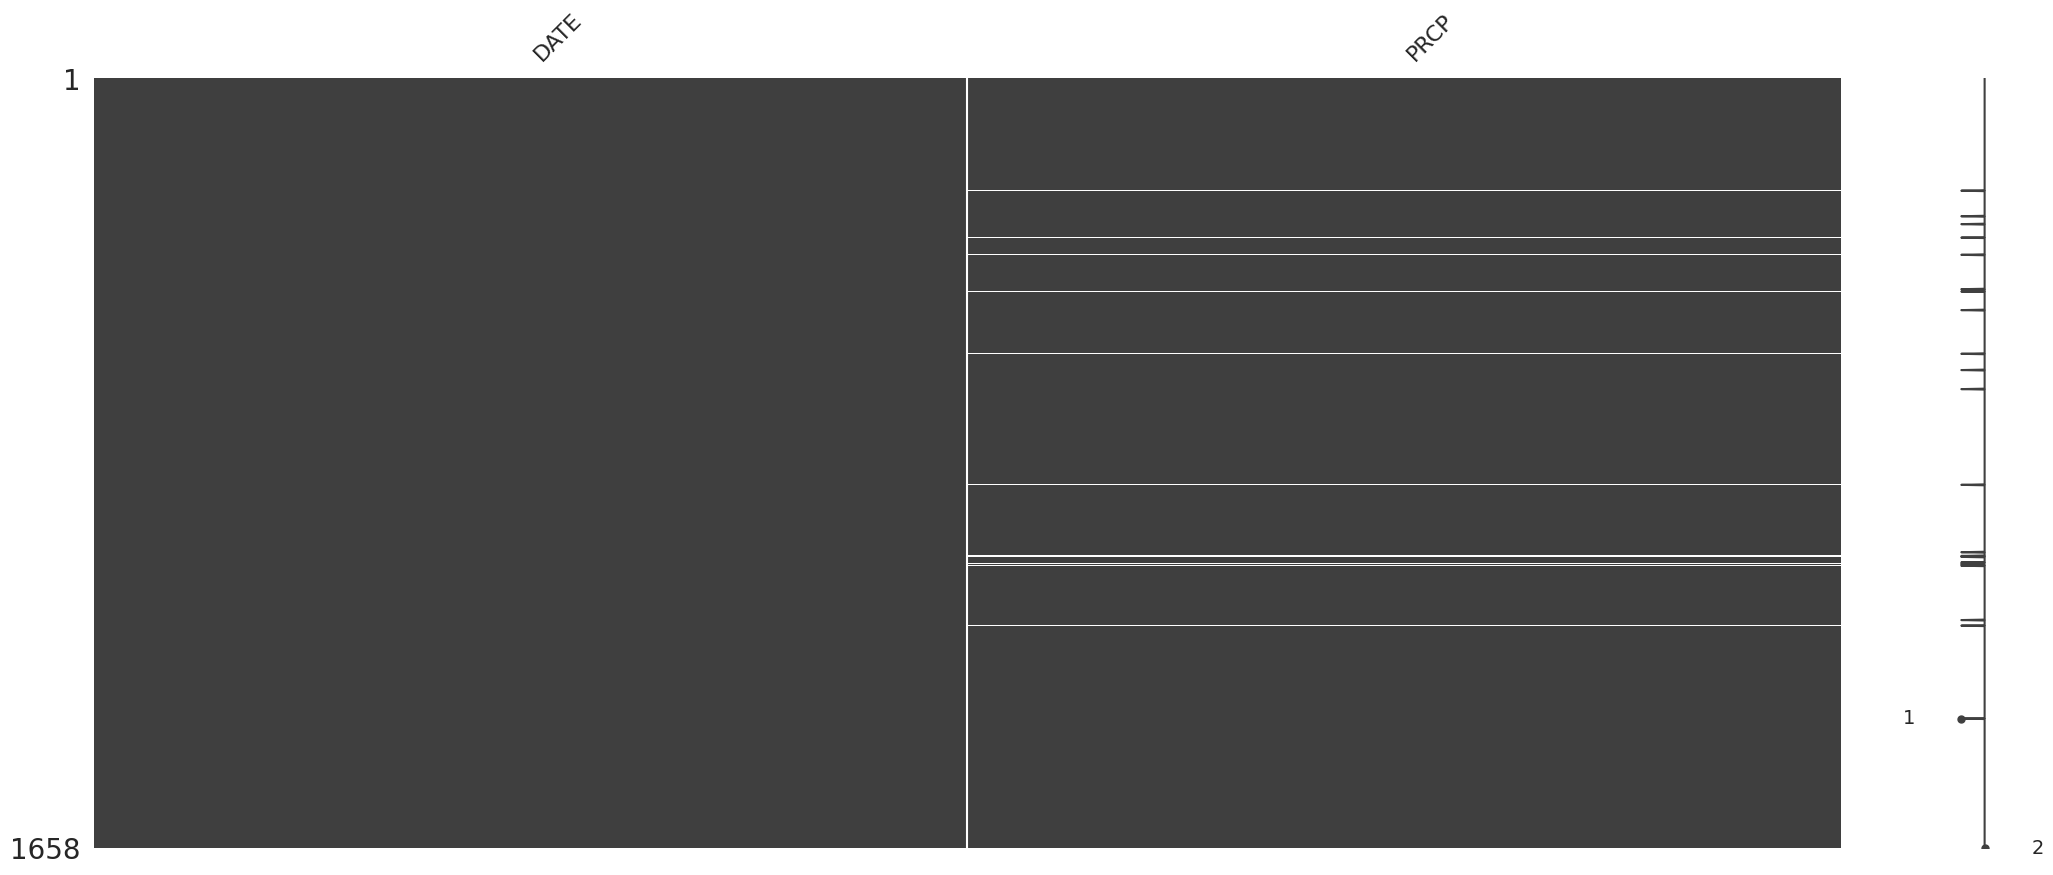

In [53]:
msno.matrix(df_seattle[['DATE','PRCP']]);

This is helpful, but we should note that this does not indicate where there are dates that are not present in the data set. We will return to this issue after joining the data sets because this will show the dates that are missing from the Seattle data set.

## Join data frames keeping `DATE` and `PRCP` columns

St. Louis has data for all dates, so do a left join with St. Louis as the left data set.

In [60]:
df = df_stlouis[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on='DATE', how='left')

## Create a tidy data frame with columns for city and precipitation

We will create one dataframe with both data sets with only the varaibles that we desire, which are data, city, and precipitation.

In [69]:
df = pd.melt(df, id_vars = 'DATE', var_name = 'CITY', value_name = 'PRCP')

### Rename columns or values to follow best practices

Rename the city values 'STL' and 'SEA'

In [71]:
df.loc[df['CITY']=='PRCP_x', 'CITY'] = 'STL'
df.loc[df['CITY']=='PRCP_y', 'CITY'] = 'SEA'
df.head()

Rename the columns to be lowercase and more easily understood using `df.rename()`

In [75]:
df = df.rename(columns={'DATE':'date', 'CITY':'city', 'PRCP':'precipitation'})

## Deal with missing values

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3652 non-null   datetime64[ns]
 1   city           3652 non-null   object        
 2   precipitation  3462 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.7+ KB


When we joined the DataFrames using a left join in the St. Louis data set, which is not missing any days, the missing days were created for the Seattle data set. We can see this block of missing values at the beginning of the second half of the precipitation column.

<Axes: >

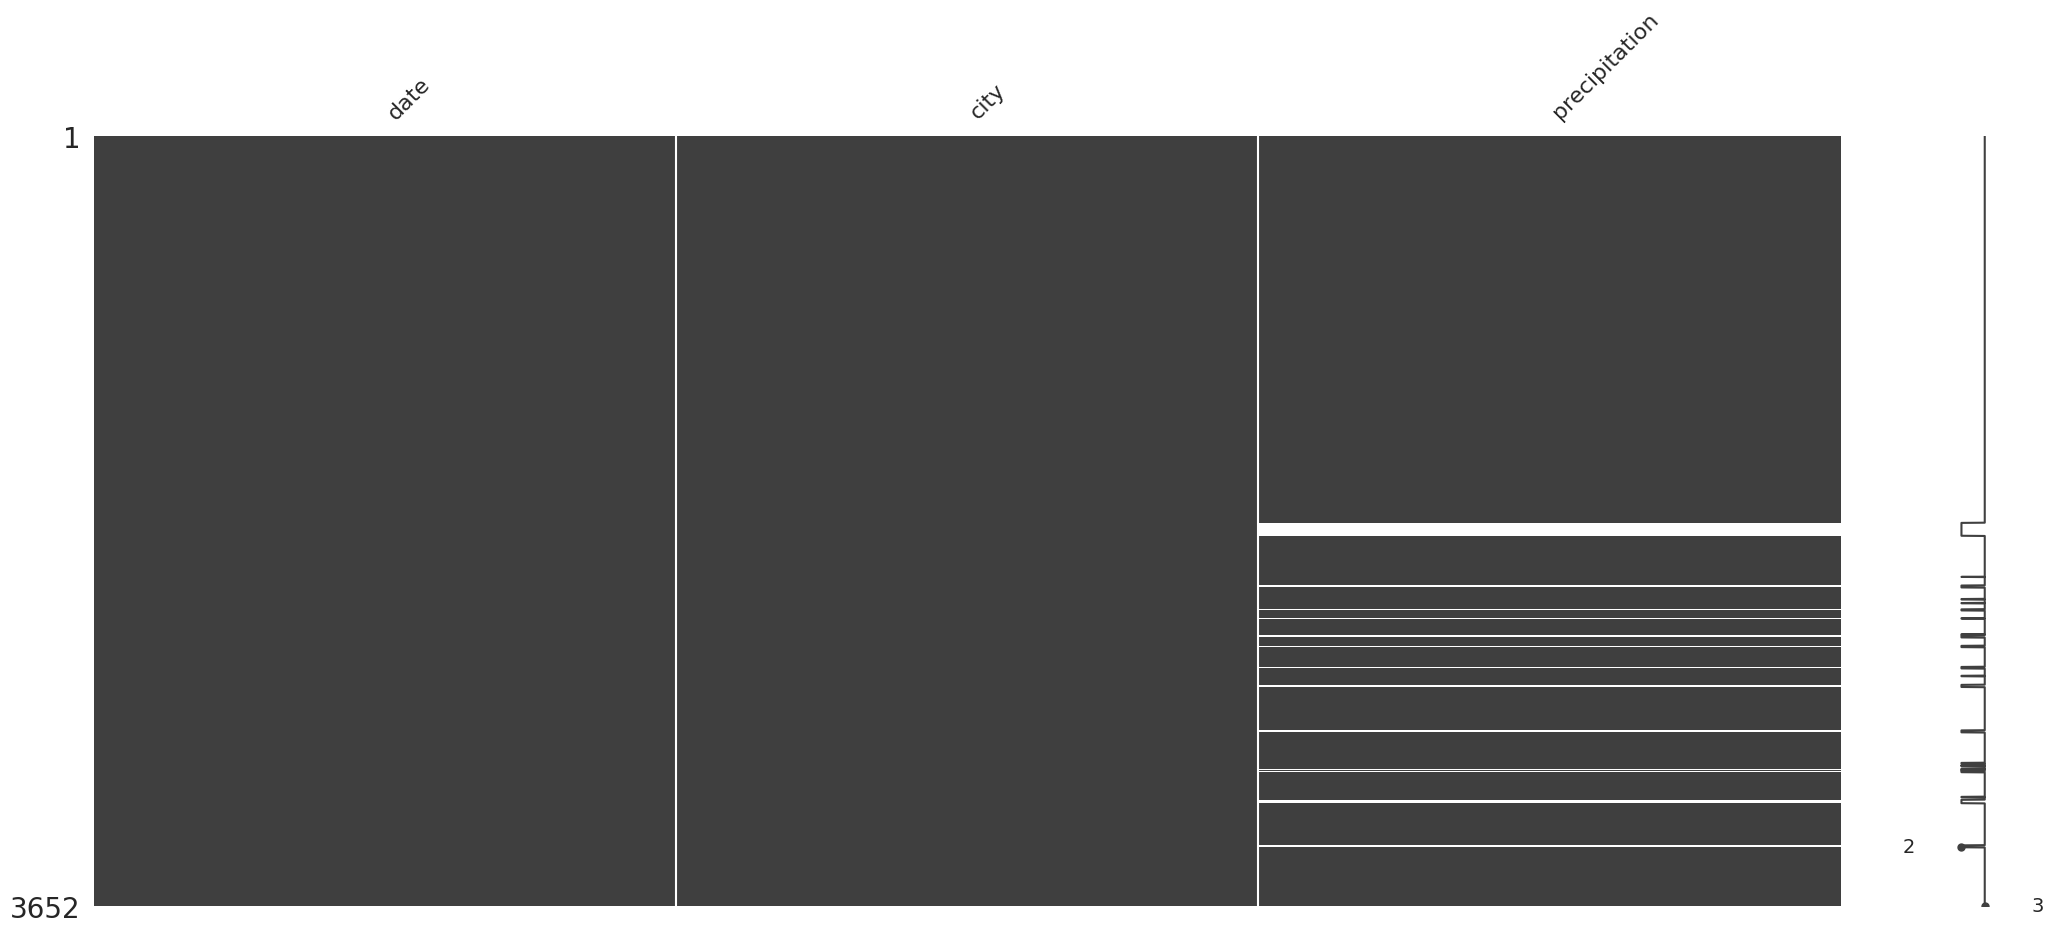

In [78]:
msno.matrix(df)

### Impute missing values

We will replace missing values with the mean across years of values on that day. 


Define a column that labels each day by the day of the year: 1, 2, ..., 365.

In [80]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year

In [82]:
df[df['precipitation'].isna()]

,date,city,precipitation,day_of_year
1834,2018-01-09,SEA,NaN,9
1835,2018-01-10,SEA,NaN,10
1836,2018-01-11,SEA,NaN,11
1837,2018-01-12,SEA,NaN,12
1838,2018-01-13,SEA,NaN,13
...,...,...,...,...
3368,2022-03-23,SEA,NaN,82
3369,2022-03-24,SEA,NaN,83
3370,2022-03-25,SEA,NaN,84
3371,2022-03-26,SEA,NaN,85


Get the index of each row where precipitation is missing.

In [83]:
indices = np.where(df['precipitation'].isna()==True)[0]

Compute the mean precipitation for each day in Seattle, averaged across years.

In [85]:
df['day_of_year'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [86]:
pd.DatetimeIndex(df.loc[df['date'] == '2019-03-01', 'date']).day_of_year

Int64Index([60, 60], dtype='int64', name='date')

In [87]:
pd.DatetimeIndex(df.loc[df['date'] == '2020-03-01', 'date']).day_of_year

Int64Index([61, 61], dtype='int64', name='date')

we will create a variable that will be the mean of the precipitation for each day across all the years.

In [88]:
mean_day_precipitation = df.loc[df['city']=='SEA', ['precipitation', 'day_of_year']].groupby('day_of_year').mean()

For each missing value, replace it with the mean daily precipitation.

In [90]:
for _, index in enumerate(indices):
    df.loc[index, 'precipitation'] = mean_day_precipitation.loc[df.loc[index,'day_of_year']].values[0]

 there are no missing values.

## Export the clean .csv file

In [127]:
from google.colab import files

df.to_csv('clean_seattle_stl_weather.csv', encoding = 'utf-8-sig', index=False) 

files.download('clean_seattle_stl_weather.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>